# 📌 Extracción

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


archivo = 'TelecomX_Data.json'
# se lee el archivo
datos = pd.read_json(archivo)

#se ubican las columnas que no hay que modificar en nada
datos_normales = datos.iloc[:,[0,1]]

# se separan las columnas que hay que hacerle alguna modificacion para que la informacion se vea clara
datos_customer = pd.json_normalize(datos['customer']);
datos_phone = pd.json_normalize(datos['phone']);
datos_internet = pd.json_normalize(datos['internet']);
datos_account = pd.json_normalize(datos['account']);

# se ponen todas las series y el df en un mismo df
df = datos_normales.join([datos_customer,datos_phone,datos_internet,datos_account]);
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


# 🔧 Transformación

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [31]:

for column in df:
  if(column == "tenure" or column == "customerID"):
    print(column)
  else:
    print(f'Esta es la columna {column}')
    print(f'{df[column].unique()} \n')
    

customerID
Esta es la columna Churn
['No' 'Yes' ''] 

Esta es la columna gender
['Female' 'Male'] 

Esta es la columna SeniorCitizen
[0 1] 

Esta es la columna Partner
['Yes' 'No'] 

Esta es la columna Dependents
['Yes' 'No'] 

tenure
Esta es la columna PhoneService
['Yes' 'No'] 

Esta es la columna MultipleLines
['No' 'Yes' 'No phone service'] 

Esta es la columna InternetService
['DSL' 'Fiber optic' 'No'] 

Esta es la columna OnlineSecurity
['No' 'Yes' 'No internet service'] 

Esta es la columna OnlineBackup
['Yes' 'No' 'No internet service'] 

Esta es la columna DeviceProtection
['No' 'Yes' 'No internet service'] 

Esta es la columna TechSupport
['Yes' 'No' 'No internet service'] 

Esta es la columna StreamingTV
['Yes' 'No' 'No internet service'] 

Esta es la columna StreamingMovies
['No' 'Yes' 'No internet service'] 

Esta es la columna Contract
['One year' 'Month-to-month' 'Two year'] 

Esta es la columna PaperlessBilling
['Yes' 'No'] 

Esta es la columna PaymentMethod
['Mailed ch

In [ ]:
df.columns = df.columns.str.lower()
df = df[df['churn']!='']
df['churn']=  df['churn'].map({'Yes': 1,"No":0})
df['seniorcitizen']=  df['seniorcitizen'].map({1:'Yes',0:'No'})

df['charges.total']=df['charges.total'].replace(" ",0.0).replace("$",'').astype(float)
df['cuentas_diarias'] = df['charges.monthly'] / 30
df.reset_index()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   churn             7043 non-null   int64  
 2   gender            7043 non-null   object 
 3   seniorcitizen     7043 non-null   object 
 4   partner           7043 non-null   object 
 5   dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   phoneservice      7043 non-null   object 
 8   multiplelines     7043 non-null   object 
 9   internetservice   7043 non-null   object 
 10  onlinesecurity    7043 non-null   object 
 11  onlinebackup      7043 non-null   object 
 12  deviceprotection  7043 non-null   object 
 13  techsupport       7043 non-null   object 
 14  streamingtv       7043 non-null   object 
 15  streamingmovies   7043 non-null   object 
 16  contract          7043 non-null   object 
 17  

/var/folders/c6/bk_wrc0d14b9y_tx5bk4sg8m0000gn/T/ipykernel_1261/1330814223.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['churn']=  df['churn'].map({'Yes': 1,"No":0})
/var/folders/c6/bk_wrc0d14b9y_tx5bk4sg8m0000gn/T/ipykernel_1261/1330814223.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['seniorcitizen']=  df['seniorcitizen'].map({1:'Yes',0:'No'})
/var/folders/c6/bk_wrc0d14b9y_tx5bk4sg8m0000gn/T/ipykernel_1261/1330814223.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy o

# 📊 Carga y análisis

In [33]:
sns.set_theme()

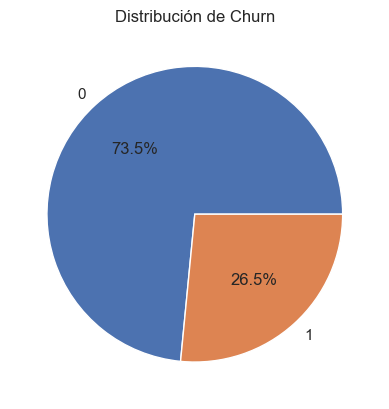

In [34]:
plt.pie(df['churn'].value_counts(), labels=df['churn'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribución de Churn')
plt.show()

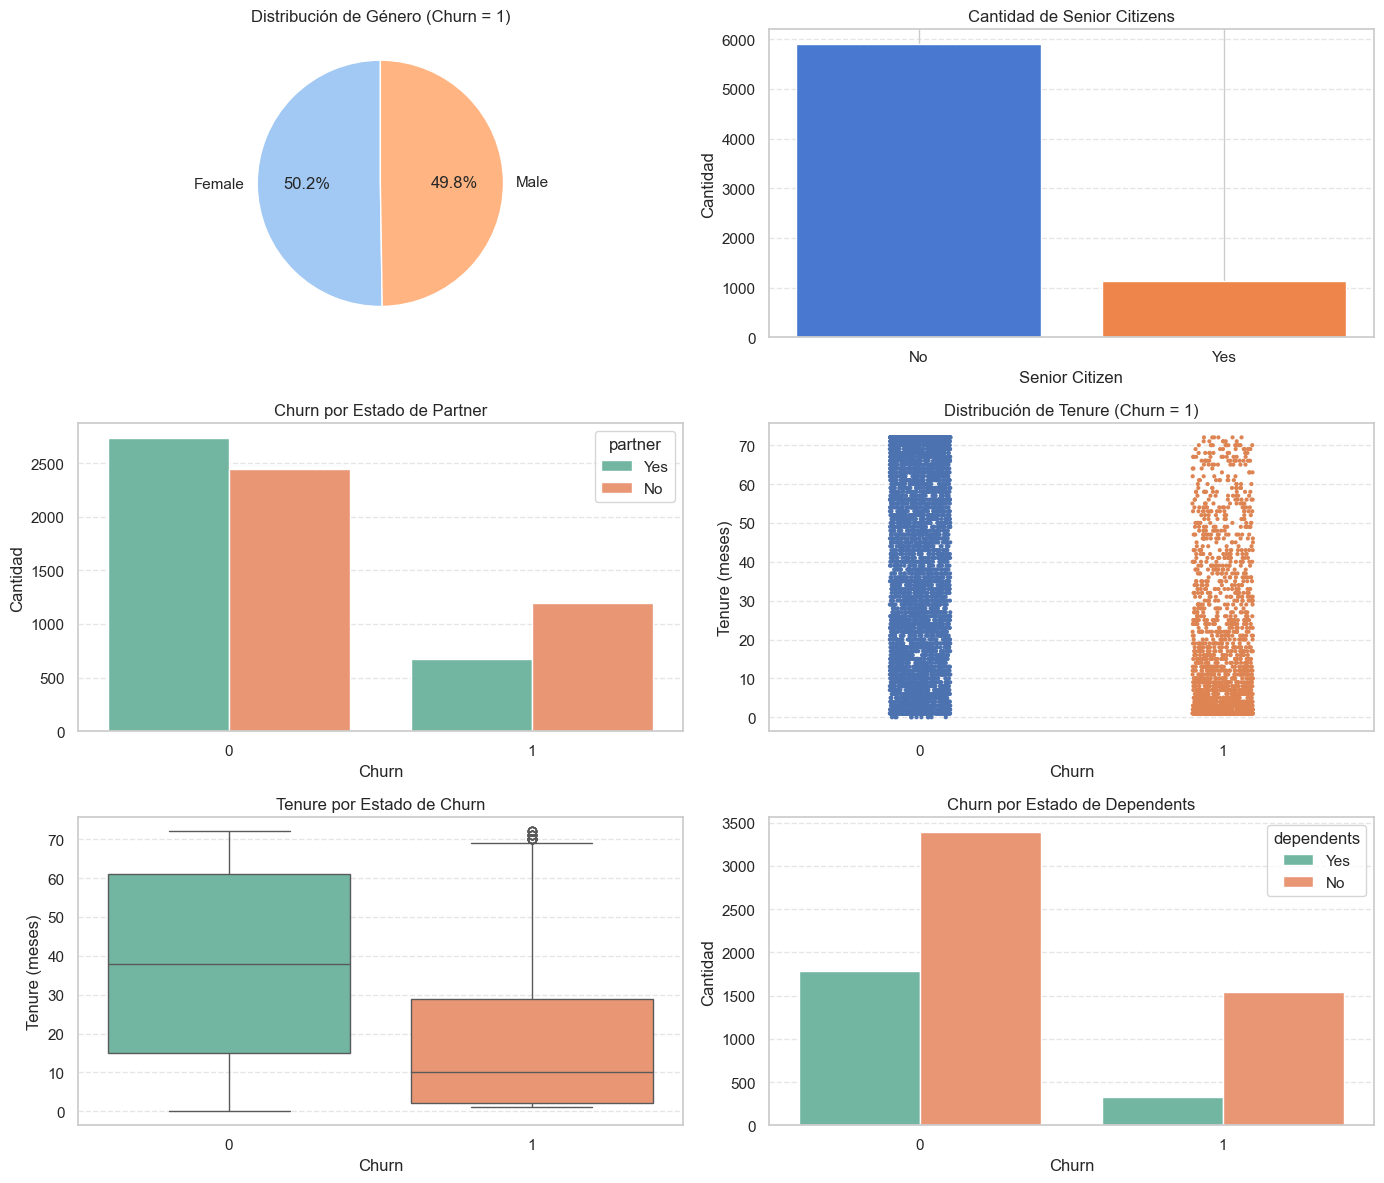

In [ ]:
sns.set_theme(style="whitegrid") 

fig, ax = plt.subplots(3, 2, figsize=(14, 12))
fig.subplots_adjust(wspace=0.4, hspace=0.6)


gender_counts = df[df["churn"] == 1]["gender"].value_counts()
ax[0, 0].pie(
    gender_counts,
    labels=gender_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=sns.color_palette("pastel"),
)
ax[0, 0].set_title("Distribución de Género (Churn = 1)", fontsize=12)


senior_counts = df["seniorcitizen"].value_counts()
ax[0, 1].bar(
    senior_counts.index.astype(str),
    senior_counts.values,
    color=sns.color_palette("muted"),
)
ax[0, 1].set_title("Cantidad de Senior Citizens", fontsize=12)
ax[0, 1].set_xlabel("Senior Citizen")
ax[0, 1].set_ylabel("Cantidad")


sns.countplot(data=df, x="churn", hue="partner", ax=ax[1, 0], palette="Set2")
ax[1, 0].set_title("Churn por Estado de Partner", fontsize=12)
ax[1, 0].set_xlabel("Churn")
ax[1, 0].set_ylabel("Cantidad")


sns.stripplot(
    data=df,
    x="churn",
    y="tenure",
    hue="churn",
    ax=ax[1, 1],
    palette="deep",
    jitter=True,
    size=3,
    legend=False,
)
ax[1, 1].set_title("Distribución de Tenure (Churn = 1)", fontsize=12)
ax[1, 1].set_xlabel("Churn")
ax[1, 1].set_ylabel("Tenure (meses)")


sns.boxplot(data=df, x="churn", y="tenure",hue="churn",legend=False, ax=ax[2, 0], palette="Set2")


ax[2, 0].set_title("Tenure por Estado de Churn", fontsize=12)
ax[2, 0].set_xlabel("Churn")
ax[2, 0].set_ylabel("Tenure (meses)")


sns.countplot(data=df, x="churn", hue="dependents", ax=ax[2, 1], palette="Set2")
ax[2, 1].set_title("Churn por Estado de Dependents", fontsize=12)
ax[2, 1].set_xlabel("Churn")
ax[2, 1].set_ylabel("Cantidad")


for axis in ax.flatten():
    axis.tick_params(axis="x")
    axis.grid(True, axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

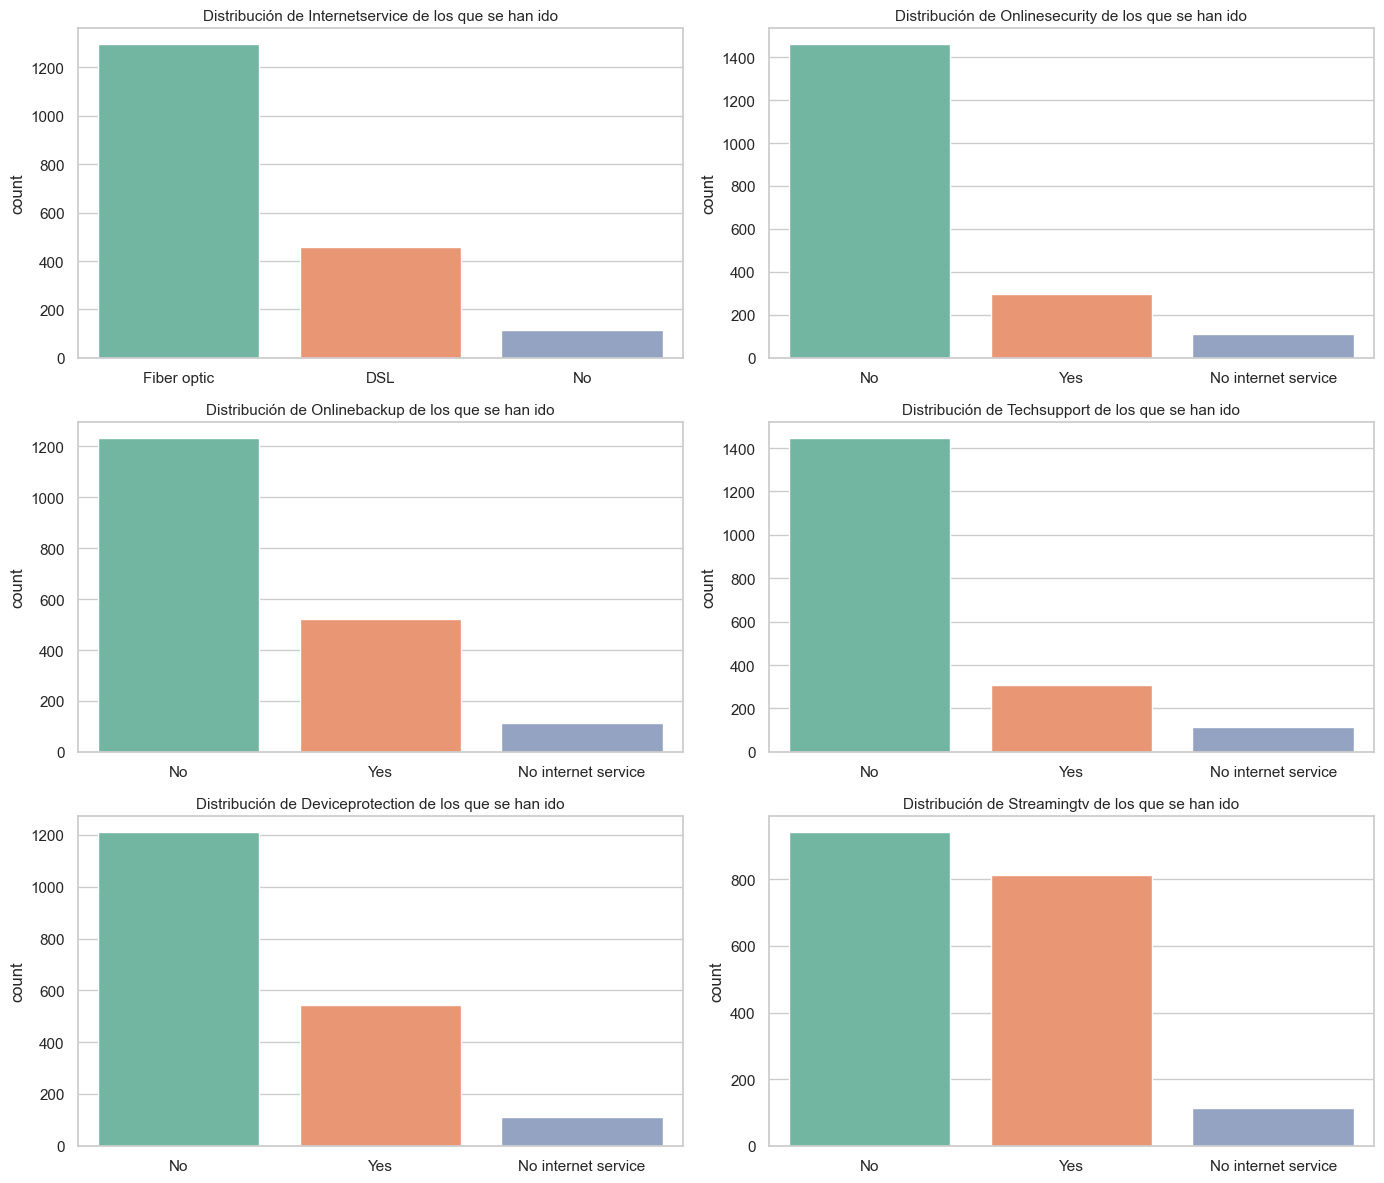

In [36]:

sns.set_theme(style='whitegrid')

fig, ax = plt.subplots(3, 2, figsize=(14, 12))
fig.subplots_adjust(wspace=0.3, hspace=0.5)


columns = [
    ('internetservice', ax[0,0]),
    ('onlinesecurity', ax[0,1]),
    ('onlinebackup', ax[1,0]),
    ('techsupport', ax[1,1]),
    ('deviceprotection', ax[2,0]),
    ('streamingtv', ax[2,1])
]


for col, axis in columns:

    data = df[df['churn'] == 1][col].value_counts().reset_index()
    data.columns = [col, 'count']
    
    sns.barplot(data=data, x=col, y='count', hue=col, palette='Set2', ax=axis, legend=False)
    axis.set_title(f'Distribución de {col.capitalize()} de los que se han ido', fontsize=11)
    axis.set_xlabel('')


plt.tight_layout()
plt.show()

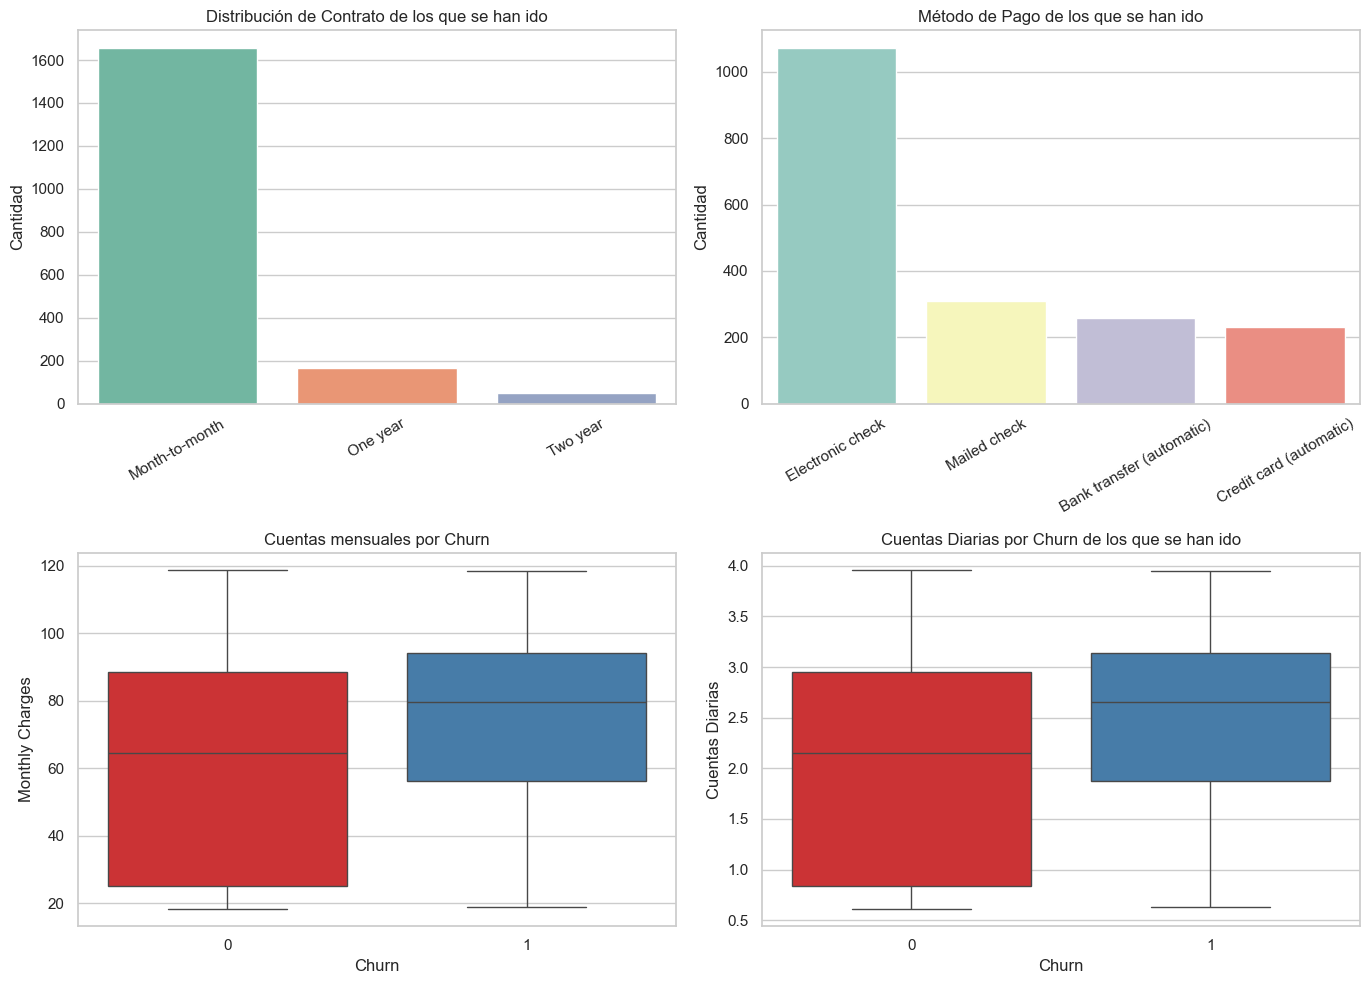

In [55]:
sns.set_theme(style='whitegrid')

fig, ax = plt.subplots(2, 2, figsize=(14, 10))
fig.subplots_adjust(wspace=0.4, hspace=0.4)


contract_counts = df[df['churn'] == 1]['contract'].value_counts().reset_index()
contract_counts.columns = ['contract', 'count']
sns.barplot(data=contract_counts, x='contract', y='count', hue='contract', palette='Set2', legend=False, ax=ax[0,0])
ax[0,0].set_title('Distribución de Contrato de los que se han ido', fontsize=12)
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('Cantidad')
ax[0,0].tick_params(axis='x', rotation=30)


payment_counts = df[df['churn'] == 1]['paymentmethod'].value_counts().reset_index()
payment_counts.columns = ['paymentmethod', 'count']
sns.barplot(data=payment_counts, x='paymentmethod', y='count', hue='paymentmethod', palette='Set3', legend=False, ax=ax[0,1])
ax[0,1].set_title('Método de Pago de los que se han ido', fontsize=12)
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('Cantidad')
ax[0,1].tick_params(axis='x', rotation=30)


sns.boxplot(data=df, x='churn', y='charges.monthly', hue='churn', palette='Set1', ax=ax[1,0], legend=False)
ax[1,0].set_title('Cuentas mensuales por Churn', fontsize=12)
ax[1,0].set_xlabel('Churn')
ax[1,0].set_ylabel('Monthly Charges')


sns.boxplot(data=df, x='churn', y='cuentas_diarias', hue='churn', palette='Set1', ax=ax[1,1], legend=False)
ax[1,1].set_title('Cuentas Diarias por Churn de los que se han ido', fontsize=12)
ax[1,1].set_xlabel('Churn')
ax[1,1].set_ylabel('Cuentas Diarias')

plt.tight_layout()
plt.show()

# 📄Informe final

## 📊 Análisis de Clientes con Churn

### ✅ Datos Iniciales
- Total de registros originales: **7267**
- Registros eliminados por valores nulos en columnas clave (`churn` o `charges.total`): **244**
- Total de registros analizados: **7023**

---

### 🔍 Hallazgos Destacables

1. **Género (`gender`)**
   - No se observan diferencias significativas entre hombres y mujeres en la tasa de cancelación del servicio.

2. **Edad (`seniorcitizen`)**
   - La **mayoría de los clientes que se han ido son menores de 65 años**, lo que indica una mayor rotación en los segmentos más jóvenes.

3. **Estado civil (`partner`)**
   - Un gran porcentaje de los clientes que se han retirado **no tenía pareja**, lo cual podría asociarse con menor estabilidad o compromiso contractual.

4. **Dependientes (`dependents`)**
   - **La mayoría de los clientes retirados no tenía dependientes** registrados, lo cual puede indicar menos responsabilidades económicas asociadas al servicio.

5. **Duración del contrato (`contract`)**
   - La cancelación es más alta entre los usuarios con **contratos de corto plazo**, especialmente **contratos mes a mes**, lo que sugiere una menor fidelización.

6. **Tipo de servicio de internet (`internet.service`)**
   - Una gran parte de los clientes que abandonaron el servicio tenía **fibra óptica**, pero **no contrataban servicios complementarios** como seguridad online, backup o soporte técnico.

7. **Método de pago (`payment.method`)**
   - Los clientes con **cheque electrónico** como método de pago presentaron una **tasa de cancelación más alta** que aquellos que usaban métodos automáticos o tarjetas.

---

### 💡 Recomendaciones Estratégicas

1. **Incentivar contratos a largo plazo**
   - Ofrecer descuentos o beneficios exclusivos para clientes que opten por contratos anuales o bianuales, con el fin de reducir la rotación de los clientes mensuales.

2. **Ofrecer paquetes combinados**
   - Diseñar bundles atractivos que incluyan servicios adicionales junto con la fibra óptica para aumentar el valor percibido y la retención.

3. **Revisar el método de pago**
   - Promover métodos de pago más automatizados y menos propensos a fallos o inconvenientes, como domiciliaciones bancarias o tarjetas.

4. **Campañas personalizadas para jóvenes**
   - Enfocar estrategias de retención en el segmento joven, ya que es el que más abandona. Esto podría incluir promociones, experiencias digitales o contenido educativo sobre los beneficios del servicio.

5. **Programas de fidelización para solteros y sin dependientes**
   - Crear programas de beneficios o puntos para usuarios que no tienen pareja o dependientes, ya que podrían ser más susceptibles a cambiar de proveedor.